In [89]:
# Import the necessary dependencies
import pandas as pd

In [90]:
# Read in the data as a DataFrame
# Provide the dataset over AWS S3 bucket. It's ~100 MB.
delayed_flights_url = "https://static.bc-edx.com/ai/ail-v-1-0/m5/lesson_2/delayed_flights.csv"
delayed_flights_df = pd.read_csv(delayed_flights_url)


In [91]:
# Get the columns
delayed_flights_df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [92]:
# Create a custom function that will calculate an average of values from a DataFrame column.

def calculate_average(df, column_name):
    """
    Calculate the average of a given column in a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column for which to calculate the average.
    
    Returns:
    float: The average value of the specified column.
    """
    return df[column_name].mean()

average_arrival_delay = calculate_average(delayed_flights_df, 'ArrDelay')
average_arrival_delay


42.18256804243217

In [93]:
# Show the average time for delayed arrivals (ArrDelay) grouped by each airline carrier.
# Pass the 'ArrDelay' column to the custom function.
# Name the new column "Avg_ArrDelay".
# Grouping by 'UniqueCarrier' and calculating the average 'ArrDelay' for each group
avg_delay_by_carrier = delayed_flights_df.groupby('UniqueCarrier')['ArrDelay'].mean().reset_index()
avg_delay_by_carrier.rename(columns={'ArrDelay': 'Avg_ArrDelay'}, inplace=True)

avg_delay_by_carrier.head()



,UniqueCarrier,Avg_ArrDelay
0,9E,47.996243
1,AA,47.794556
2,AQ,21.255376
3,AS,36.114195
4,B6,49.455843


In [94]:
# Use the custom function you created to calculate the average for a DataFrame colummn and
# show the average time for delayed arrivals and departures for each carrier.
# Grouping by 'UniqueCarrier' and calculating the average 'ArrDelay' and 'DepDelay' for each group
avg_delays_by_carrier = delayed_flights_df.groupby('UniqueCarrier').agg({
    'ArrDelay': 'mean',
    'DepDelay': 'mean'
}).reset_index()
avg_delays_by_carrier.rename(columns={'ArrDelay': 'Avg_ArrDelay', 'DepDelay': 'Avg_DepDelay'}, inplace=True)

avg_delays_by_carrier.head()


,UniqueCarrier,Avg_ArrDelay,Avg_DepDelay
0,9E,47.996243,48.389124
1,AA,47.794556,46.840312
2,AQ,21.255376,26.680000
3,AS,36.114195,38.888600
4,B6,49.455843,50.692277


In [95]:
# Create a custom function that returns the total of the items.
# The function will take in a list of items as a parameter.
def total_of_items(item_list):
    """
    Returns the total sum of the items in a list.

    Parameters:
    item_list (list): A list of numerical items.

    Returns:
    float: The total sum of the items in the list.
    """
    return sum(item_list)

sample_list = [1, 2, 3, 4, 5]
total_sum = total_of_items(sample_list)
total_sum



15

In [96]:
# Use the two custom functions you created and show the total number of flights 
# and the average number of flights that were diverted for each flight origin and destination.
# Name the new columns "Total_Flights" and "Avg_Flights_Diverted".
# Calculate the total number of delayed flights for each carrier
total_delayed_flights_by_carrier = delayed_flights_df[delayed_flights_df['ArrDelay'] > 0].groupby('UniqueCarrier').size()

# Using the custom function to calculate the total
total_delayed_flights = total_of_items(total_delayed_flights_by_carrier)

total_delayed_flights




# Sort the results in descending order on the new columns, and display the top 25 results.
total_delayed_flights_by_carrier.sort_values(ascending=False, inplace=True)
total_delayed_flights_by_carrier.head(25)


UniqueCarrier
WN    187573
AA     93530
MQ     76634
UA     73051
OO     68353
XE     57142
NW     45151
US     44760
DL     42879
EV     38790
CO     37439
FL     34062
YV     33120
9E     28947
OH     27226
B6     19622
F9     14581
AS     14260
HA      2458
AQ       654
dtype: int64

In [97]:
# Create two more custom functions as per your suggestion

def number_of_items(item_list):
    """
    Returns the number of items in a list.

    Parameters:
    item_list (list): A list of items.

    Returns:
    int: The number of items in the list.
    """
    return len(item_list)

def calculate_percentage(numerator, denominator):
    """
    Calculates the percentage of a given numerator and denominator.

    Parameters:
    numerator (int): The numerator.
    denominator (int): The denominator.

    Returns:
    float: The percentage of the numerator and denominator.
    """
    return (numerator / denominator) * 100

# Example usage: Calculate the percentage of delayed flights
total_flights = number_of_items(delayed_flights_df)
total_delayed_flights = number_of_items(delayed_flights_df[delayed_flights_df['ArrDelay'] > 0])
percentage_delayed = calculate_percentage(total_delayed_flights, total_flights)

percentage_delayed


89.66759650001192

In [100]:
# Show the total number of diverted flights, the total flights, 
# and the percentage of diverted flights for each carrier by day of the week.
# Group by 'UniqueCarrier' and 'DayOfWeek', and calculate the total flights and total diverted flights
carrier_day_group = delayed_flights_df.groupby(['UniqueCarrier', 'DayOfWeek'])
total_flights_by_carrier_day = carrier_day_group.size()
total_diverted_flights_by_carrier_day = carrier_day_group['Diverted'].sum()

# Calculating the percentage of diverted flights
pct_diverted_by_carrier_day = calculate_percentage(total_diverted_flights_by_carrier_day, total_flights_by_carrier_day)

# Creating a new DataFrame
carrier_day_stats_df = pd.DataFrame({
    'Total_Flights': total_flights_by_carrier_day,
    'Total_Flights_Diverted': total_diverted_flights_by_carrier_day,
    'Pct_Flights_Diverted': pct_diverted_by_carrier_day
}).reset_index()

# Sorting and displaying the top 25 rows
carrier_day_stats_top25 = carrier_day_stats_df.sort_values(by='Pct_Flights_Diverted', ascending=False).head(25)
carrier_day_stats_top25



,UniqueCarrier,DayOfWeek,Total_Flights,Total_Flights_Diverted,Pct_Flights_Diverted
19,AQ,6,133,3,2.255639
14,AQ,1,69,1,1.449275
26,AS,6,2232,21,0.940860
25,AS,5,2658,24,0.902935
20,AQ,7,113,1,0.884956
27,AS,7,2157,19,0.880853
3,9E,4,4304,35,0.813197
68,FL,6,5507,43,0.780824
127,XE,2,8673,62,0.714862
12,AA,6,12522,89,0.710749


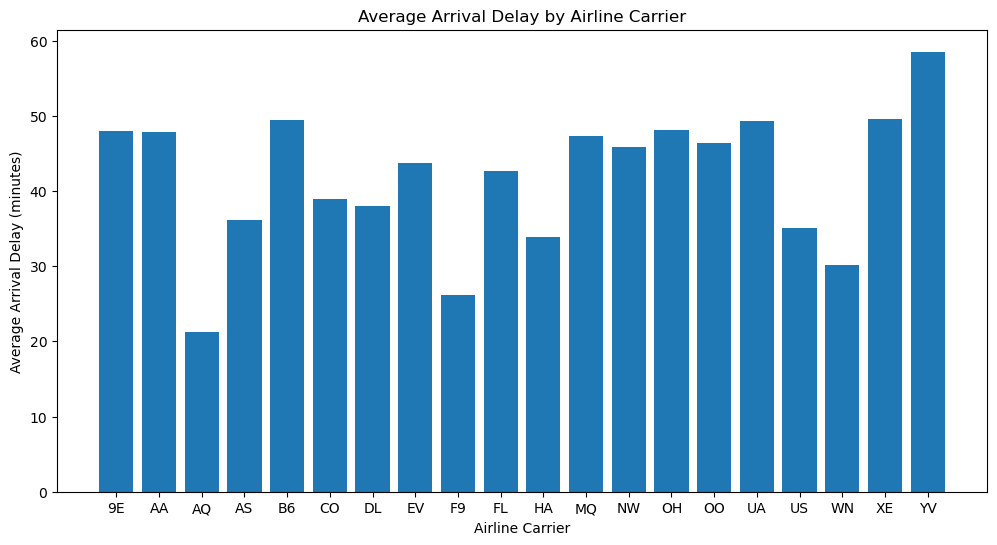

In [101]:
import matplotlib.pyplot as plt

# Plotting the average arrival delay for each carrier
plt.figure(figsize=(12, 6))
plt.bar(avg_delay_by_carrier['UniqueCarrier'], avg_delay_by_carrier['Avg_ArrDelay'])
plt.xlabel('Airline Carrier')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Airline Carrier')
plt.show()


<Figure size 1500x800 with 0 Axes>

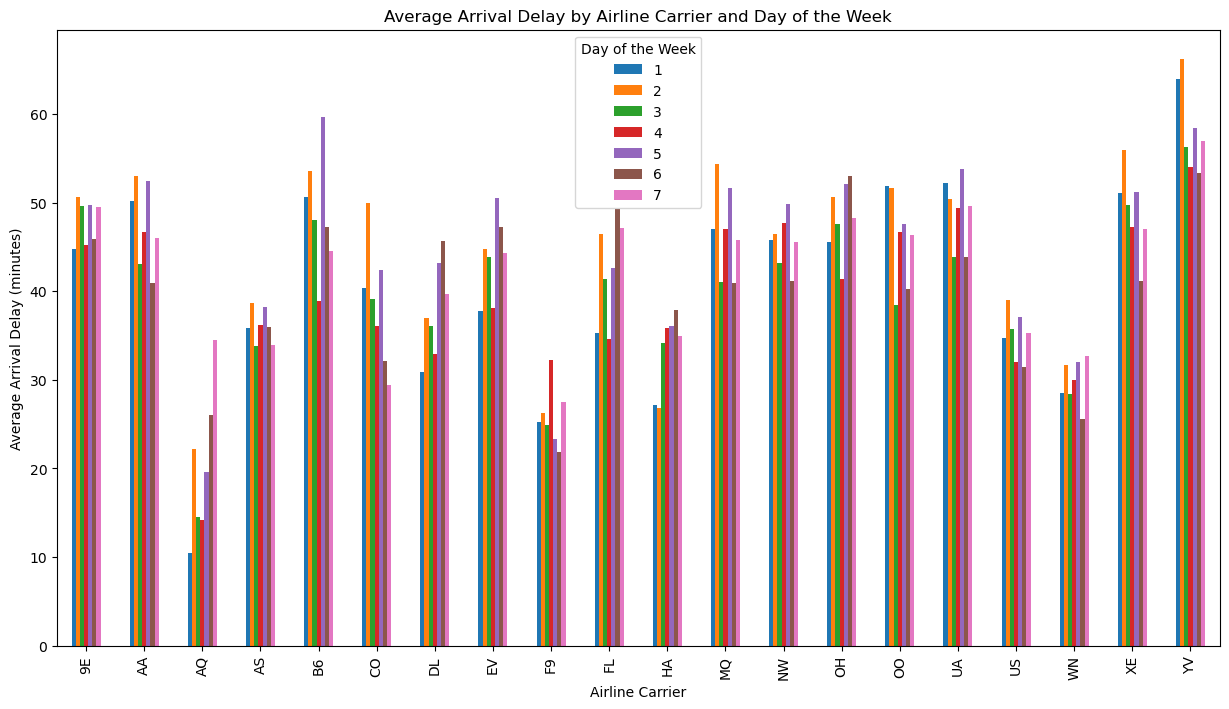

In [102]:
# Group the data by 'UniqueCarrier' and 'DayOfWeek', then calculate the average delay
carrier_day_avg_delay = delayed_flights_df.groupby(['UniqueCarrier', 'DayOfWeek'])['ArrDelay'].mean().unstack()

# Creating the bar plot
plt.figure(figsize=(15, 8))
carrier_day_avg_delay.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Airline Carrier')
plt.ylabel('Average Arrival Delay (minutes)')
plt.title('Average Arrival Delay by Airline Carrier and Day of the Week')
plt.legend(title='Day of the Week')
plt.show()